<a href="https://colab.research.google.com/github/GabrielSmithz/CatFacts/blob/main/Project_Smith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COPD Data Analysis**

#### **Gabriel Smith**
#### **Final Project Stat 200**

---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking. 

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Task 1</font> (5 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [ ]:
#1.
copdGene <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
head(copdGene)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


In [ ]:
#2.
dat1 <- na.omit(copdGene)
nrow(dat1)

[1] 4000

2. There are 4000 rows in dat1.

In [ ]:
#3.
dat2 <- copdGene[which(is.na(copdGene$FEV1_phase2)), ]
nrow(dat2)

[1] 1747

3. There are 1747 rows in dat2.

<br>

---

<br>






####<font color=red>Task 2</font> (10 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


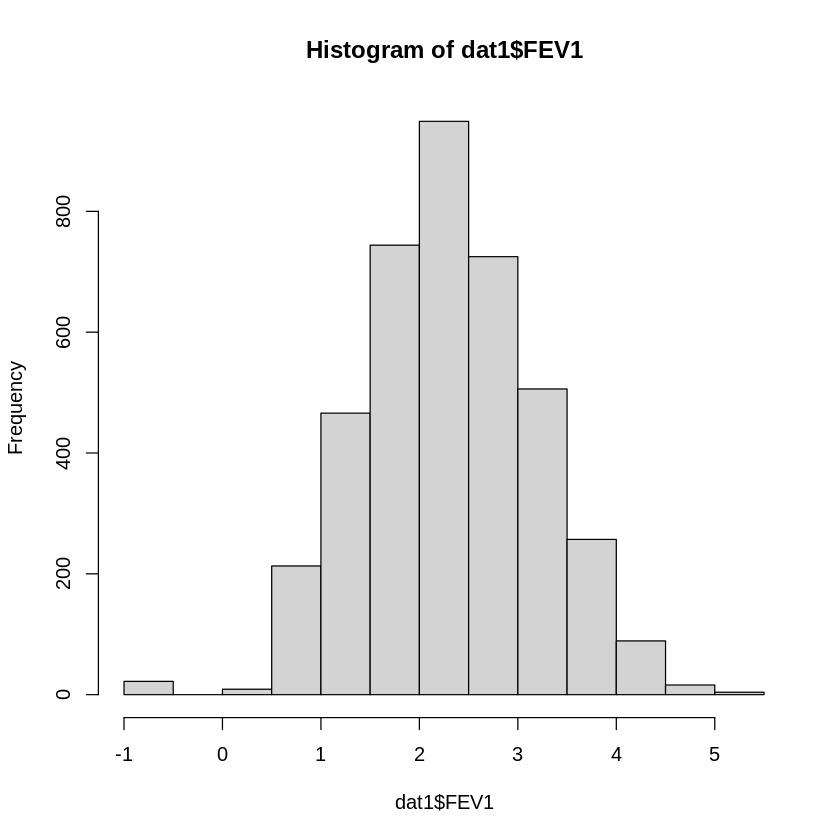

In [ ]:
#1.
hist(dat1$FEV1)

In [ ]:
#2.
y <- sd(dat1$FEV1)
x <- mean(dat1$FEV1)
c_one <- x+y
c_two <- x-y
(sum(dat1$FEV1 < c_one & dat1$FEV1 > c_two)/4000)*100

[1] 67.575

2. There is 67.575% of FEV1 values within 1 standard deviation of the mean.

In [ ]:
#3.
c_three <- x+(2*y)
c_four <- x-(2*y)
(sum(dat1$FEV1 < c_three & dat1$FEV1 > c_four)/4000)*100

[1] 96.75

3. There is 96.75% of FEV1 values within 1 standard deviation of the mean.

4. Yes I would say that the histogram is approximately normally distributed.

<br>

---

<br>






####<font color=red>Task 3</font> (10 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
2. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

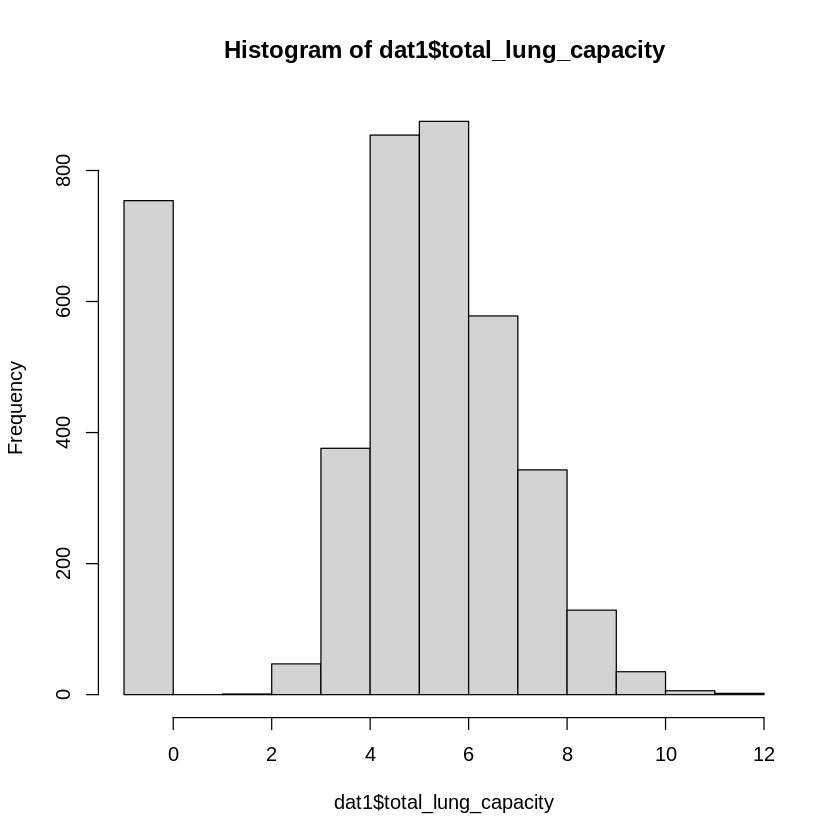

In [ ]:
#1.
hist(dat1$total_lung_capacity)

1. The histogram looks normally distrubted if we don't include the values less than 0. The mean represents the data as a whole well, but within the distribution it is a little low. The standard deviation is pretty big for the histogram.

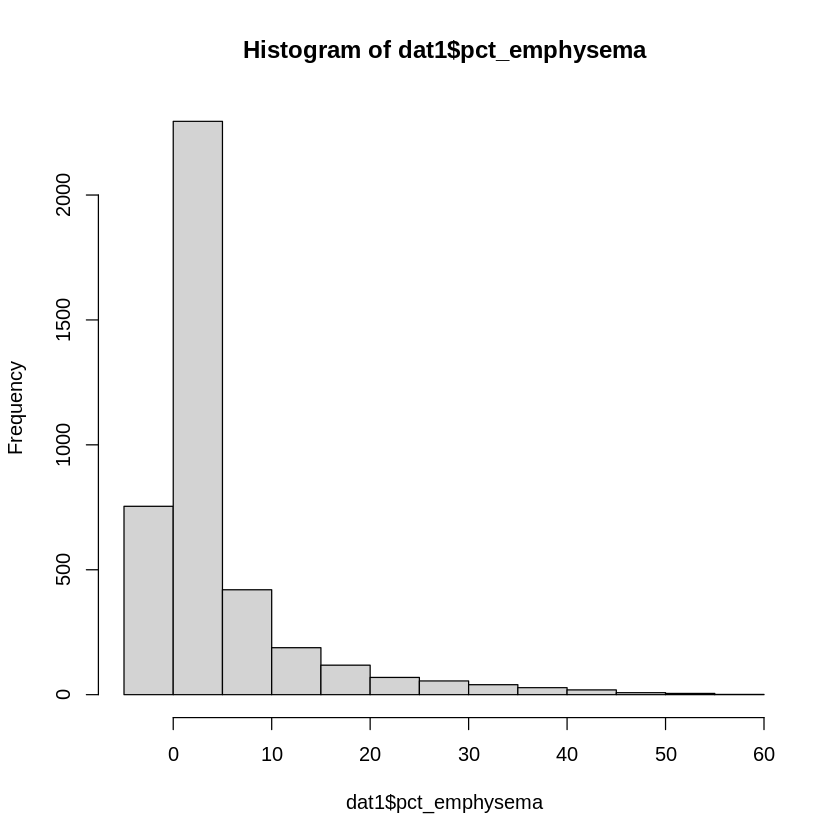

In [ ]:
#2.
hist(dat1$pct_emphysema)

2. The histogram is skewd to the right. The mean is is really low compared to the range of the data. The majority of people are in the 0-5 range with less and less people as pct_emphysema increases. 

<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Using `dat1`, create a boxplot to visualize the relationship between `FEV_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1 is different between current or former smokers. Explain your answer in complete sentences.

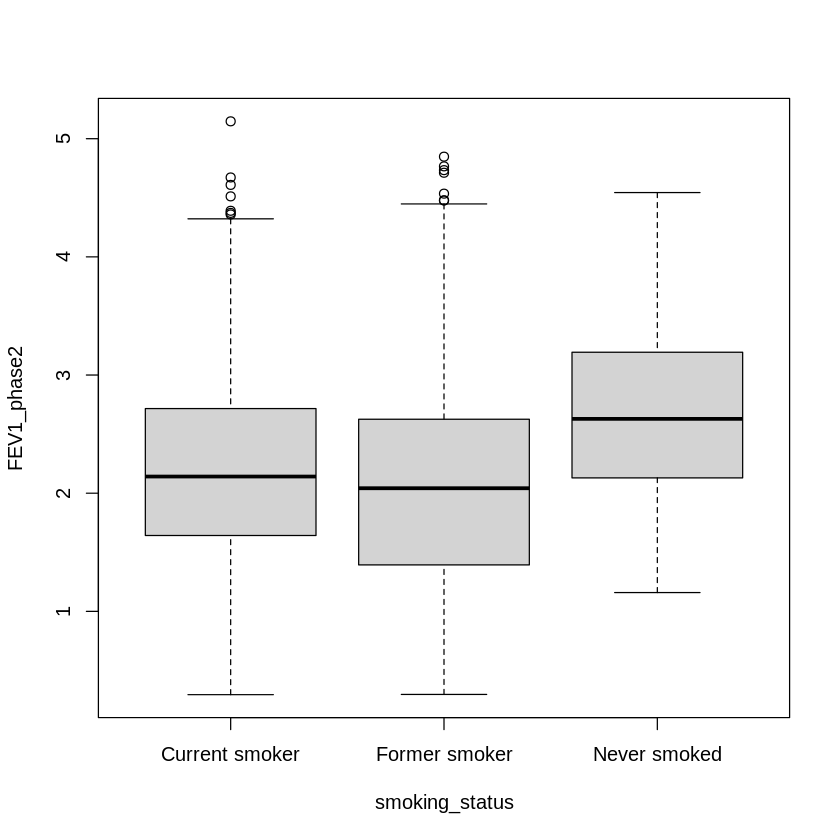

In [ ]:
#1.
boxplot(FEV1_phase2 ~ smoking_status, data = dat1)

2. Those who have never smoked have better breathing on average. Which makes sense, we know that smoking is not good for your lungs so those who have never smoked would have better lungs than those who have smoked. Current smokers have a few people who have really good breathing, which could be because they are new smokers.

<br>

---

<br>






####<font color=red>Task 5</font> (10 points)

1. Using `dat1`, create two more boxplots to visualize the relationship between `FEV1_phase2` and two other categorical variables.
2. For the first variable, use a 95% confidence interval to determine if the average `FEV1_phase2` is different between two categories.
3. For the second variable, use a 95% confidence interval to determine if the average `FEV1_phase2` in phase 2 is different between two categories.

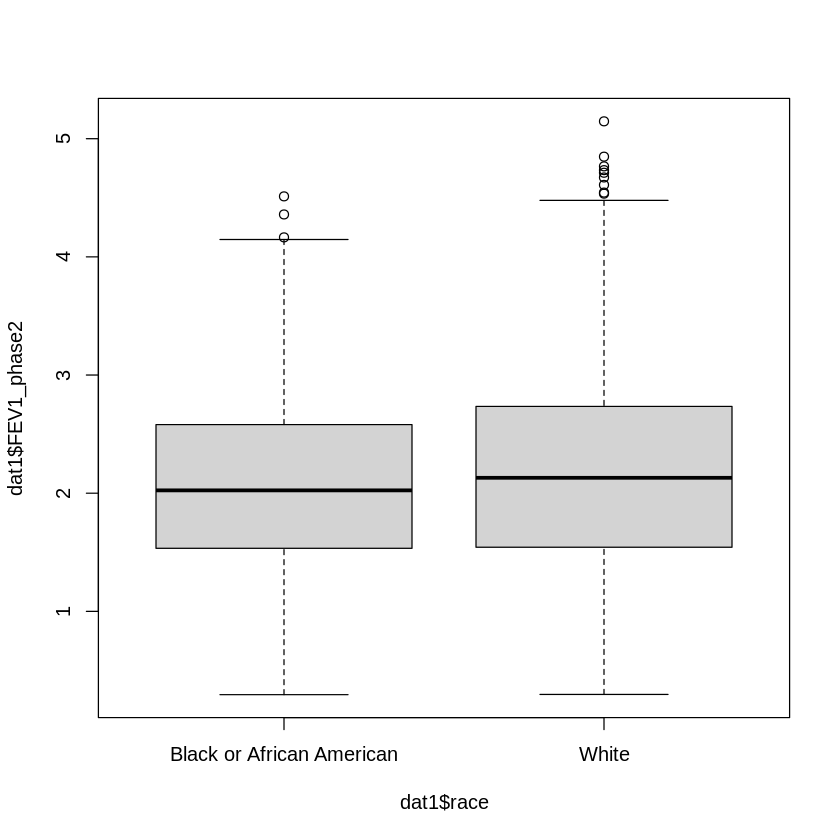

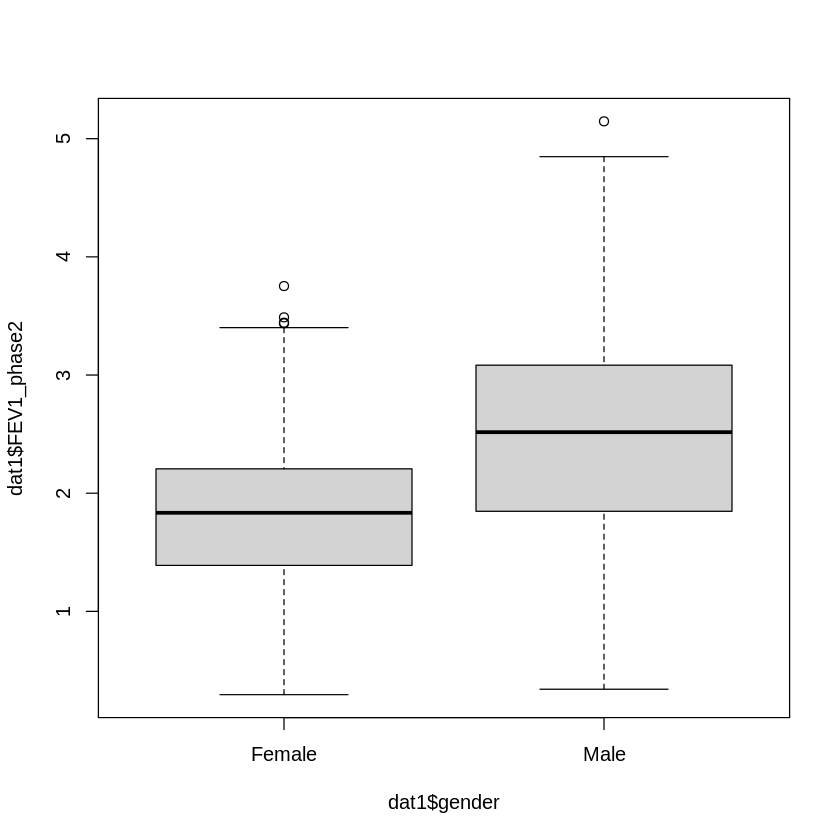

In [ ]:
#1.
boxplot(dat1$FEV1_phase2 ~ dat1$race)
   
boxplot(dat1$FEV1_phase2 ~ dat1$gender)

In [ ]:
#2.
t.test(dat1$FEV1_phase2 ~ dat1$race)$conf.int

[1] -0.12506982 -0.01728048
attr(,"conf.level")
[1] 0.95

2. The confidence interval is significantly different than zero. Maybe white people have better lungs since they are less likely to be exposed to smoking or other polluant to there lungs from where they grew up. Black people or African Americans may have been exposed to something that affected their breathing. Could be a social cause.

In [ ]:
#3.
t.test(dat1$FEV1_phase2 ~ dat1$gender)$conf.int

[1] -0.6918855 -0.5976740
attr(,"conf.level")
[1] 0.95

3. The confidence interval is significantly different than zero. We see that males have higher Fev1_phase2 on average than females which is why the confidence interval contains negatives. This could be attriubted to males being bigger biologically on average than women, meaning they may have bigger lungs.

<br>

---

<br>






####<font color=red>Task 6</font> (20 points)

1. Using `dat1`, create a scatterplot visualizing the relationship between `FEV1_phase2` (y-axis) and `FEV1` (x-axis). Note that values that are -1 are missing observations. You may ignore this for this class.
2. What relationship do you observe based on the scatterplot?
3. Fit a simple linear regression model by regressing `FEV1_phase2` (Y) on `FEV1` (X). Summarize the regression.
4. Describe the $R^2$ of the regression in the context of its definition.
5. What is the slope and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
6. What is the intercept and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
7. Use a 95% confidence interval to determine if the slope is significantly less than 1. Explain what this means in terms of breathing health of the patients.

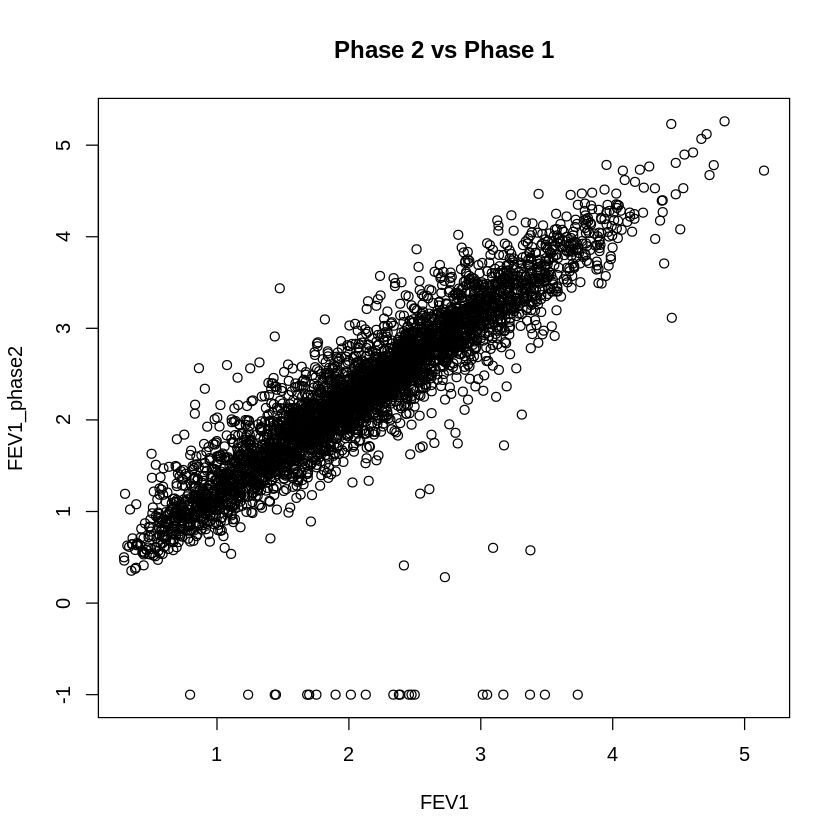

In [ ]:
#1.
plot(dat1$FEV1_phase2, dat1$FEV1,
    xlab = "FEV1",
    ylab = "FEV1_phase2",
    main = "Phase 2 vs Phase 1")


2. It looks like a positive linear realationship, with those who could breath out 1 liter of air in 1 second in Fev1, look to breath out 1 liter of air in 1 second five years later in Fev1_phase2. This seems to be the case for other values as well.


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


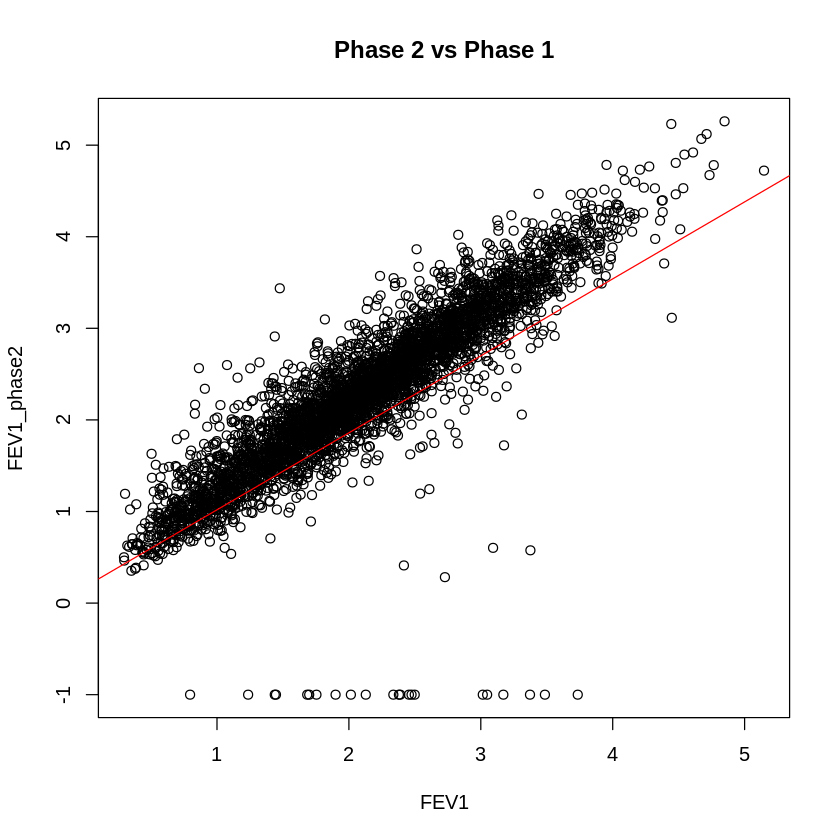

In [ ]:
#3. 
simple_fit <- lm(FEV1_phase2 ~ FEV1, data = dat1)

plot(dat1$FEV1_phase2, dat1$FEV1,
    xlab = "FEV1",
    ylab = "FEV1_phase2",
    main = "Phase 2 vs Phase 1")

abline(simple_fit, col="red")
summary(simple_fit)

4. The r sqeared accounts for 78.97% of the variance of Fev1_phase2 is explained by (it might not be off because of -1). 

5. The slope is .84 and for every liter breathed out in 1 sec in Fev1 it goes up by .84 in FEV1_phase2. This means that patients are getting worse. They are breathing less air out per second.

6. The intercept is .1783, meaning that if you breathed out zero liters of air in Fev1 then after five years during Fev1_phase2 you would be able to breathe out .1783 liters of air in a second. This doesn't make sense because no one is breathing out zero liters of air because then you wouldn't be breathing. This is just where the linear model would expect the intercept would be.

In [ ]:
#7.
confint(simple_fit)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


7. The slope is significantly less than one since 1 is outside of the confindence interval. Meaning that the slope is going up but not very fast. This means that the breathing per second isn't increasing very much. 

<br>

---

<br>






####<font color=red>Task 7</font> (10 points)

1. Identify two other variables in `dat1` that you think would be related to breathing health, as measured by `FEV1_phase2`. Plot these variables using scatterplots (`FEV1` on Y axis, variable 1 or variable 2 on X axis). What do you observe? Explain in complete sentences.
2. Include these two variables (categorical or numeric), along with `FEV1`, in your regression from Task 6. Show the regression summary. Keep `FEV1_phase2` as Y.
3. Using 95% confidence intervals, are the slopes for the two variables you selected significantly different from 0? Explain and interpret in complete sentences. 


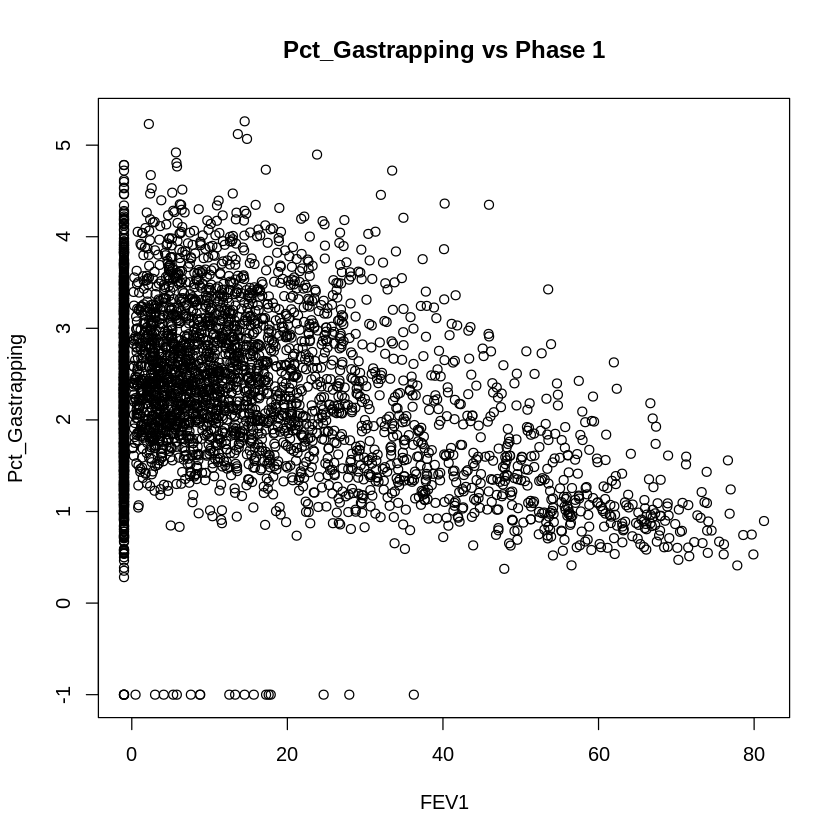

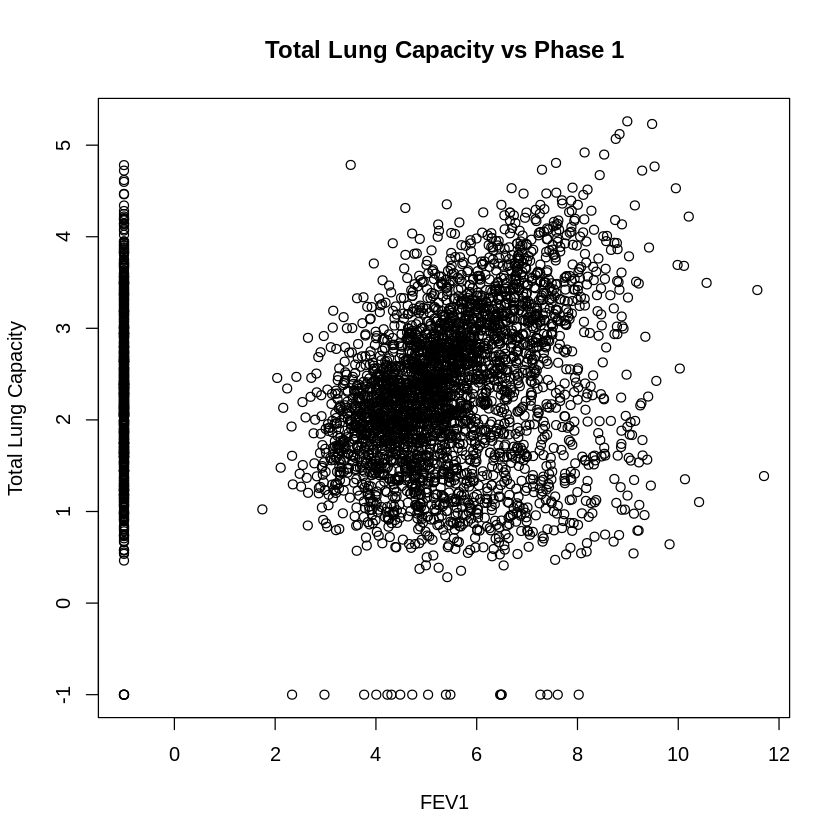

In [ ]:
#1.
plot(dat1$pct_gastrapping, dat1$FEV1,
    xlab = "FEV1",
    ylab = "Pct_Gastrapping",
    main = "Pct_Gastrapping vs Phase 1")

plot(dat1$total_lung_capacity, dat1$FEV1,
    xlab = "FEV1",
    ylab = "Total Lung Capacity",
    main = "Total Lung Capacity vs Phase 1")

1. We see when we there is a lot of vairation between percent gastrapping and Fev1. It seems that those with lower Fev1 (don't breath out as much) have higher percent gastrapping. This makes sense because when the participants try to breath out, the gas is trapped. For Total lung capacity we see that those with more lung capacity can breath out more air for Fev1.

In [ ]:
#2.
simple_fit2 <- lm(FEV1_phase2 ~ FEV1 + total_lung_capacity + pct_gastrapping , data = dat1)
summary(simple_fit2)


Call:
lm(formula = FEV1_phase2 ~ FEV1 + total_lung_capacity + pct_gastrapping, 
    data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5760 -0.1813 -0.0165  0.1574  4.1633 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.2751017  0.0195474  14.074   <2e-16 ***
FEV1                 0.7877636  0.0076502 102.973   <2e-16 ***
total_lung_capacity  0.0255164  0.0025839   9.875   <2e-16 ***
pct_gastrapping     -0.0062998  0.0004446 -14.170   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3697 on 3996 degrees of freedom
Multiple R-squared:  0.7999,	Adjusted R-squared:  0.7997 
F-statistic:  5325 on 3 and 3996 DF,  p-value: < 2.2e-16


In [ ]:
#3.
confint(simple_fit2)

,2.5 %,97.5 %
(Intercept),0.236777816,0.313425591
FEV1,0.772765045,0.802762236
total_lung_capacity,0.020450439,0.030582400
pct_gastrapping,-0.007171373,-0.005428161


3. Yes the new variables are significantly different from zero. Pct gastrapping is sloping down slightly, meaning that the higher they could breath out in Fev1 the lower the gastrapping. For total lung capacity the more lung capacity the more you could breath out in Fev1.

<br>

---

<br>






####<font color=red>Task 8</font> (5 points)

1. Using your regression model with three variables from Task 7, predict the `FEV1_phase2`.
2. Calculate the root mean squared error. Is this error large or small? Explain your answer.


```
# Hint
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(...))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
```




In [ ]:
#1.
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(y ~ dat1$FEV1 +  dat1$total_lung_capacity +  dat1$pct_gastrapping))

In [ ]:
#2.
rmse <- sqrt(mean((y - y_predicted)^2))
rmse

[1] 0.3695431

2. The root mean squared error is large. This means that our predictions are not very accurate. Meaning if we were to add more data points they would not be accuratley represented.

<br>

---

<br>






####<font color=red>Task 9</font> Group Task (15 points)

1. Using the statistical/machine learning concepts from class, build a model (preferably random forest) that best predicts the `FEV1_phase2` variable in the `dat2` dataframe.
2. Submit your predictions as a csv file in the format presented in the `copd_predictions.csv` file on Canvas.

<br>
<br>

* The group with the lowest prediction error will receive 10 points extra credit on their overall project grade.
* The group with the second lowest prediction error will receive 5 points extra credit on their overall project grade.
* The group with the third lowest prediction error will receive 2 points extra credit on their overall project grade.

In [ ]:
#Install Package
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#1.
samp <- sample(1:nrow(dat1), 3000)
train <- dat1[samp, ]

valid <- dat1[-samp,]

mse <- function(true, pred) {
  return(mean((true - pred)^2))
}


fit <- randomForest(FEV1_phase2 ~ 
                    I(FEV1^7) + FEV1 + FVC + pct_gastrapping + I(FVC^7) + I(pct_gastrapping^7) + asthma + FEV1_FVC_ratio + I(FEV1_FVC_ratio^6) + sid  + gender + race + height_cm + weight_kg + diasBP + pneumonia + total_lung_capacity, 
                    data = train,
                    importance = TRUE, 

                    ntree    = 150,  
                    mtry     = 3,   
                    nodesize = 8,    
                    maxnodes = NULL, 
                    )

mse(valid$FEV1_phase2, predict(fit, newdata = valid))   

[1] 0.07384162

In [ ]:
#2.
true <- train$FEV1_phase2
pred <- predict(fit, train)
mse(true, pred)

true <- valid$FEV1_phase2
pred <- predict(fit, valid)
mse(true, pred)

FEV1_phase2_predictions <- predict(fit, dat2)
preds <- data.frame(sid = dat2$sid, FEV1_phase2_predictions)
write.csv(preds, 'copd_predictions.csv')

[1] 0.02527776

[1] 0.07384162